# Hoja 2:

## Ejercicio 1:

#### Sea (X, f) un sistema dinamico con X c R^2. Implementar los siguientes procedimientos:

#### 1. orb_num_2d y orb_num_2d_av. El primero es para calcular numéricamente toda la órbita numérica de un punto x0 en R^2 hasta cierta iteración n. El segundo es para calcular solamente estados avanzados de la órbita, es decir, los términos a partir de una cierta iteración.

In [253]:
import numpy as np

def orb_num_2d(f, x0, n):
    orbita = [np.array(x0)]
    for _ in range(n):
        x0 = f(x0)
        orbita.append(np.array(x0))
    return orbita

def orb_num_2d_av(f, x0, n, m):
    orbita = orb_num_2d(f, x0, n)
    return orbita[m:]

#### 2. an_graf_2d y an_graf_2d_av. El primero es para pintar todos los puntos de la órbita de x0 hasta cierta iteración n. El segundo es análogo pero para un estado avanzado de dicha órbita.

In [254]:
import matplotlib.pyplot as plt

def an_graf_2d(f, x0, n):
    # Calcular la órbita usando orb_num
    orbita = orb_num_2d(f, x0, n)
    xs = [p[0] for p in orbita]
    ys = [p[1] for p in orbita]

    plt.plot(xs[0], ys[0], 'kx')
    plt.axis('equal')
    plt.show()

def an_graf_2d_av(f, x0, n, m):
    # Calcular la órbita usando orb_num
    orbita = orb_num_2d_av(f, x0, n, m)
    xs = [p[0] for p in orbita]
    ys = [p[1] for p in orbita]

    plt.plot(orbita[0][0], orbita[0][1], 'kx')
    plt.axhline(0, color='k', linewidth=1)   # eje X
    plt.axvline(0, color='k', linewidth=1)   # eje Y
    plt.axis('equal')
    plt.show()



#### 3. an_graf_2d_lineas y an_graf_2d_lineas_av. El primero es para representar gráficamente la órbita de x0, dibujando un segmento entre f^k(x0) y f^{k+1}(x0) para todo k. El segundo hace lo mismo pero a partir de una cierta iteración m.

In [255]:
import numpy as np
import matplotlib.pyplot as plt

def an_graf_2d_lineas(f, x0, n):
    orbita = orb_num_2d(f, x0, n)

    plt.figure(figsize=(6, 6))
    for i in range(len(orbita) - 1):
        x_start, y_start = orbita[i]
        x_end, y_end = orbita[i + 1]
        plt.plot([x_start, x_end], [y_start, y_end], 'r-')
        plt.plot(x_end, y_end, 'bo')
    
    plt.plot(orbita[0][0], orbita[0][1], 'go')
    plt.axhline(0, color='k', linewidth=1)   # eje X
    plt.axvline(0, color='k', linewidth=1)   # eje Y
    plt.axis('equal')
    plt.show()


def an_graf_2d_lineas_av(f, x0, m, n):
    orbita = orb_num_2d_av(f, x0, n, m)

    plt.figure(figsize=(6, 6))
    for i in range(len(orbita) - 1):
        x_start, y_start = orbita[i]
        x_end, y_end = orbita[i + 1]
        plt.plot([x_start, x_end], [y_start, y_end], 'r-')
        plt.plot(x_end, y_end, 'bo')

    plt.plot(orbita[0][0], orbita[0][1], 'go')
    plt.axhline(0, color='k', linewidth=1)   # eje X
    plt.axvline(0, color='k', linewidth=1)   # eje Y
    plt.axis('equal')
    plt.show()

#### 4. an_graf_2d_lineas_animado, para que se observe la evolución de la órbita de x0 paso a paso hasta cierta iteración n.

In [256]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def an_graf_2d_lineas_animado(f, x0, n, intervalo=300):
    orbita = orb_num_2d(f, x0, n)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect('equal')
    

    linea, = ax.plot([], [], 'r-')
    punto_inicio, = ax.plot(orbita[0][0], orbita[0][1])
    puntos = [orbita[0]]

    def update(i):
        if i < len(orbita) - 1:
            puntos.append(orbita[i + 1])
            xs, ys = zip(*puntos)
            linea.set_data(xs, ys)
        return linea,

    ani = FuncAnimation(fig, update, frames=n, interval=intervalo, blit=True, repeat=False)
    plt.axhline(0, color='k', linewidth=1)   # eje X
    plt.axvline(0, color='k', linewidth=1)   # eje Y
    plt.axis('equal')
    plt.show()

## Ejercicio 2:

### Estúdiense los puntos fijos y el carácter de éstos para los siguientes sistemas dinámicos en (R^2, f), con f una función de clase 1. Decídase si la cuenca de atracción de cada punto fijo es todo el plano R^2 o no lo es, y calcúlense las órbitas de varios puntos tanto dentro como fuera de esta cuenca cuando sea posible. ¿Observas en algún caso la existencia de atractores extraños?

#### Apartado 1: f(x, y) = (5/12) * ( x - sqrt(3)*y + 1 ,  sqrt(3)*x + y + 2 )

c1 = [1 1]
c2 = [0.1116455  1.97168784]
c3 = [-0.95975751  1.73544313]
c4 = [-1.23568049  0.86378932]
c5 = [-0.72158645  0.30146997]
c6 = [-0.10156156  0.43818566]
c7 = [0.05811609 0.94261494]
c8 = [-0.23939204  1.26803124]
c9 = [-0.59820273  1.18891336]
c10 = [-0.69060878  0.89699826]
c11 = [-0.51843973  0.70867865]


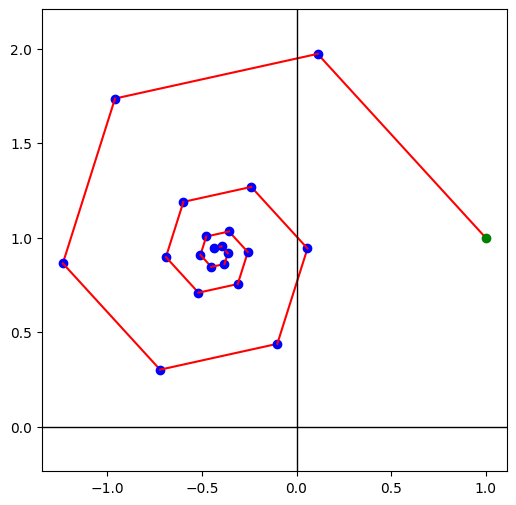

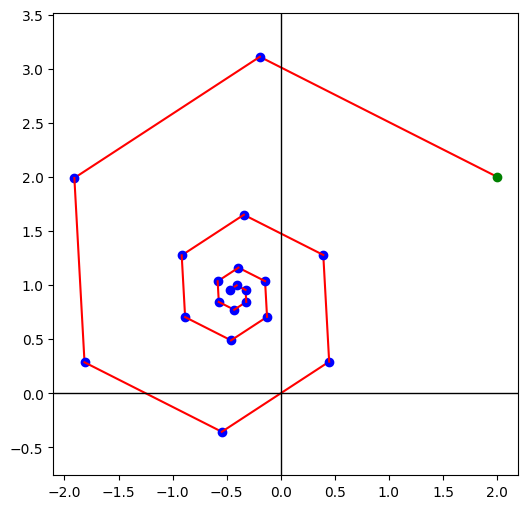

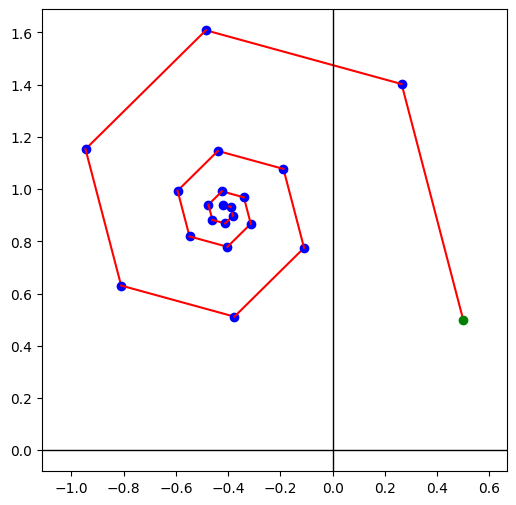

In [257]:
import numpy as np

def f1(v):
    x, y = v
    fx = (5/12) * (x - np.sqrt(3)*y + 1)
    fy = (5/12) * (np.sqrt(3)*x + y + 2)
    return [fx, fy]

x0 = [1, 1]
for k, p in enumerate(orb_num_2d(f1, x0, 10)):
    print(f'c{k+1} = {p}')


an_graf_2d_lineas(f1, x0, 20)
an_graf_2d_lineas(f1, [2,2], 20)
an_graf_2d_lineas(f1, [0.5,0.5], 20)


Parece que hay un punto fijo atractivo aproximadamente en [-0.43, 0.94]. La cuenca de atracción parece todo R. 

#### Apartado 2: f(x,y) = ( 0.5*(7*x + 3*y - 1),  0.5*(-6*x - 2*y - 3) )

c1 = [0.  2.5]
c2 = [ 3.25 -4.  ]
c3 = [ 4.875 -7.25 ]
c4 = [ 5.6875 -8.875 ]
c5 = [ 6.09375 -9.6875 ]
c6 = [  6.296875 -10.09375 ]
c7 = [  6.3984375 -10.296875 ]
c8 = [  6.44921875 -10.3984375 ]
c9 = [  6.47460938 -10.44921875]
c10 = [  6.48730469 -10.47460938]
c11 = [  6.49365234 -10.48730469]


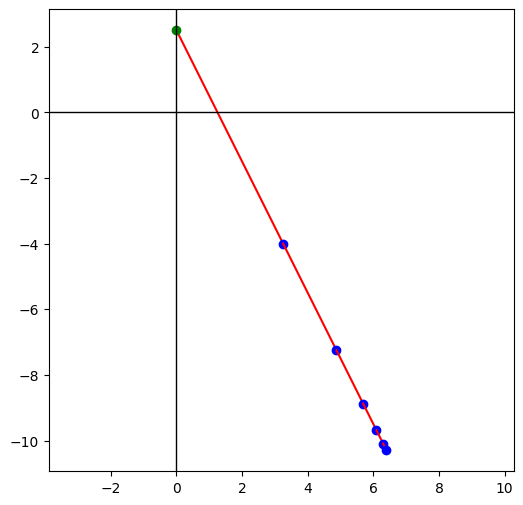

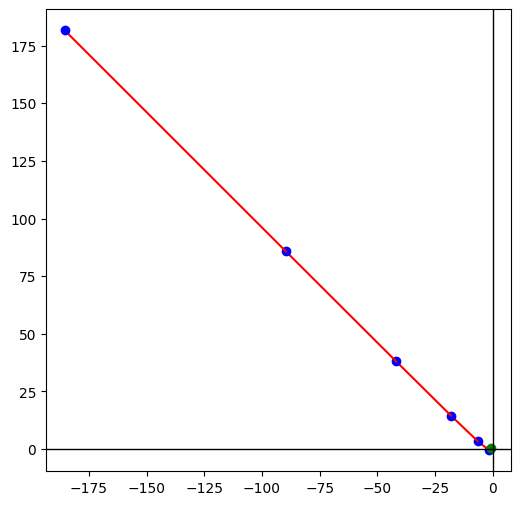

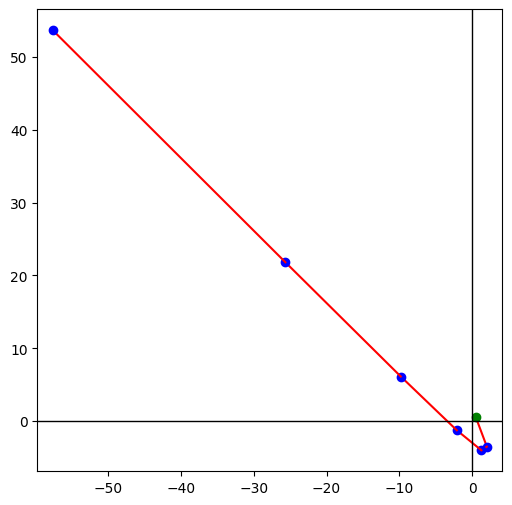

In [258]:
def f2(v):
    x, y = v
    fx = 0.5 * (7*x + 3*y - 1)
    fy = 0.5 * (-6*x - 2*y - 3)
    return [fx, fy]

x0 = [0,2.5]  
for k, p in enumerate(orb_num_2d(f2, x0, 10)):
    print(f'c{k+1} = {p}')


an_graf_2d_lineas(f2, x0, 6)
an_graf_2d_lineas(f2, [-0.5, 0.5], 6)
an_graf_2d_lineas(f2, [0.5,0.5], 6)

Parece que hay un punto fijo de silla alrededor del [6.2,-10.2]. Su curva estable parece la recta y = −2x + 2.5. Si el punto x0 se encuentra allí, convergerá el punto fijo, si no, divergerá al infinito.

#### Apartado 3: f(x,y) = ( (sqrt(2)/2)*(x - y - 1),  (sqrt(2)/2)*(x + y) )

c1 = [0.  2.5]
c2 = [-2.47487373  1.76776695]
c3 = [-3.70710678 -0.5       ]
c4 = [-2.97487373 -2.97487373]
c5 = [-0.70710678 -4.20710678]
c6 = [ 1.76776695 -3.47487373]
c7 = [ 3.         -1.20710678]
c8 = [2.26776695 1.26776695]
c9 = [4.71027738e-16 2.50000000e+00]
c10 = [-2.47487373  1.76776695]
c11 = [-3.70710678 -0.5       ]


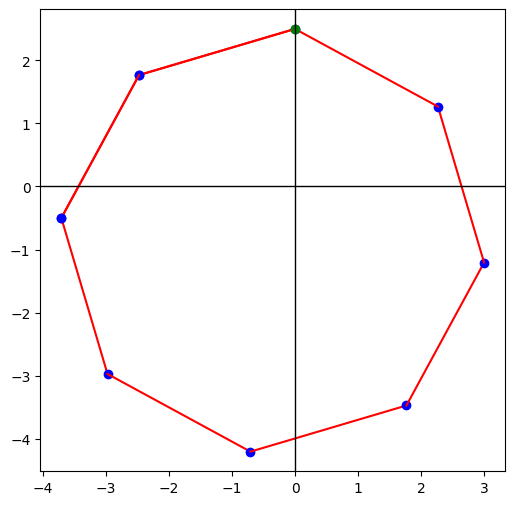

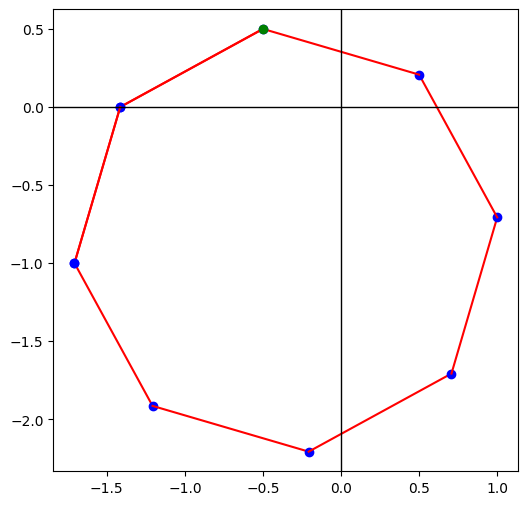

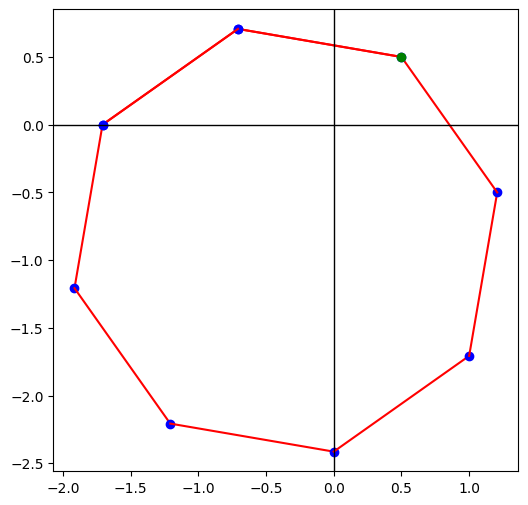

In [267]:
def f3(v):
    x, y = v
    k  = np.sqrt(2) / 2
    fx = k * (x - y - 1)
    fy = k * (x + y)
    return [fx, fy]

x0 = [0,2.5]  
for k, p in enumerate(orb_num_2d(f3, x0, 10)):
    print(f'c{k+1} = {p}')

an_graf_2d_lineas(f3, x0, 10)
an_graf_2d_lineas(f3, [-0.5, 0.5], 10)
an_graf_2d_lineas(f3, [0.5,0.5], 10)

Parece que es un punto fijo indiferente, formando siempre un octógono dibujándolo hacia la izquierda. La cuenca de atracción no es todo R porque es indiferente.

#### Apartado 4: f(x,y) = ( (5/12)*(x - sqrt(3)*y + x**2 * y), (5/12)*(sqrt(3)*x + y + y**2 * x) )

c1 = [0.  2.5]
c2 = [-1.80421959  1.04166667]
c3 = [-0.09066549 -1.68376537]
c4 = [ 1.17160864 -0.87410218]
c5 = [0.61906124 0.85431521]
c6 = [-0.22218794  0.9909939 ]
c7 = [-0.78738202  0.16164551]
c8 = [-0.40297701 -0.50946411]
c9 = [ 0.16529525 -0.54668122]
c10 = [ 0.45718258 -0.08790885]
c11 = [0.24627951 0.29478654]


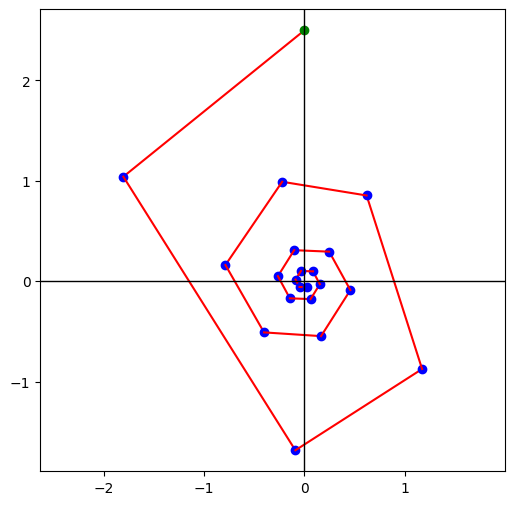

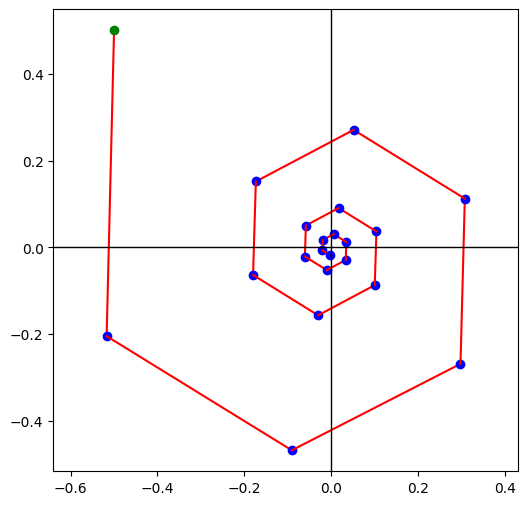

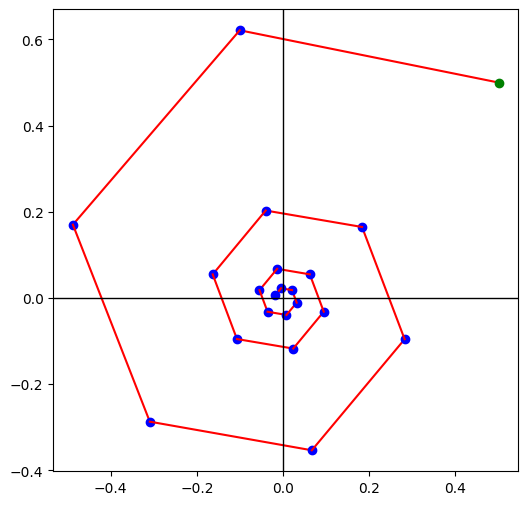

In [274]:
def f4(v):
    x, y = v
    factor = 5/12
    fx = factor * (x - np.sqrt(3)*y + x**2 * y)
    fy = factor * (np.sqrt(3)*x + y + y**2 * x)
    return [fx, fy]

x0 = [0,2.5]  
for k, p in enumerate(orb_num_2d(f4, x0, 10)):
    print(f'c{k+1} = {p}')

an_graf_2d_lineas(f4, x0, 20)
an_graf_2d_lineas(f4, [-0.5, 0.5], 20)
an_graf_2d_lineas(f4, [0.5,0.5], 20)

Parece que hay un punto fijo atractivo en [0,0]. La cuenca de atracción parece todo R.

#### Apartado 5: f(x,y) = ( 0.5*x + 2*x*y,  -2/3*y + x**2 )

c1 = [0.  2.5]
c2 = [ 0.         -1.66666667]
c3 = [0.         1.11111111]
c4 = [ 0.         -0.74074074]
c5 = [0.         0.49382716]
c6 = [ 0.         -0.32921811]
c7 = [0.         0.21947874]
c8 = [ 0.         -0.14631916]
c9 = [0.         0.09754611]
c10 = [ 0.         -0.06503074]
c11 = [0.         0.04335382]


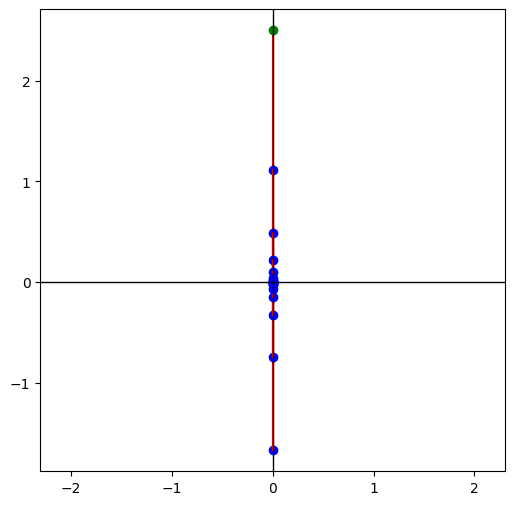

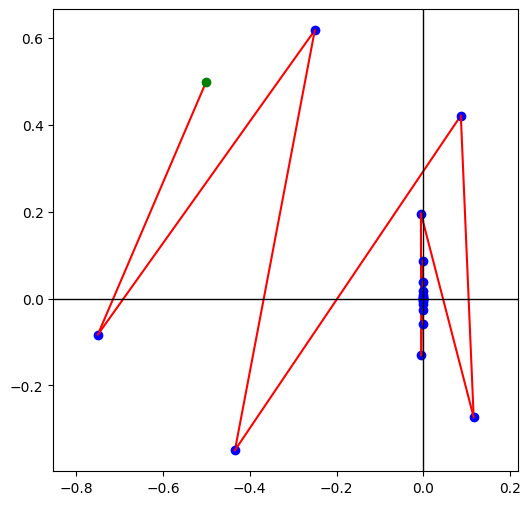

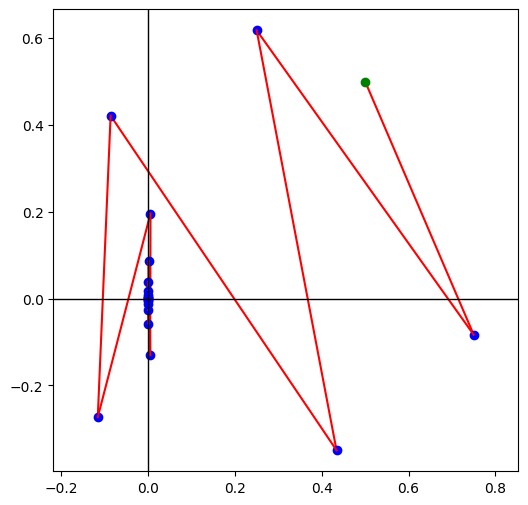

In [277]:
def f5(v):
    x, y = v
    fx = 0.5 * x + 2*x*y
    fy = -(2/3) * y + x**2
    return [fx, fy]

x0 = [0,2.5]  
for k, p in enumerate(orb_num_2d(f5, x0, 10)):
    print(f'c{k+1} = {p}')

an_graf_2d_lineas(f5, x0, 20)
an_graf_2d_lineas(f5, [-0.5, 0.5], 20)
an_graf_2d_lineas(f5, [0.5,0.5], 20)

Parece que el [0,0] es un punto fijo atractivo. La cuenca de atracción parece todo R.

#### Apartado 6: f(x,y) = ( 1 + y - (7/5)*x**2,  0.3*x )

c1 = [0.  2.5]
c2 = [3.5 0. ]
c3 = [-16.15   1.05]
c4 = [-363.1015   -4.845 ]
c5 = [-1.84583624e+05 -1.08930450e+02]
c6 = [-4.76995601e+10 -5.53750872e+04]


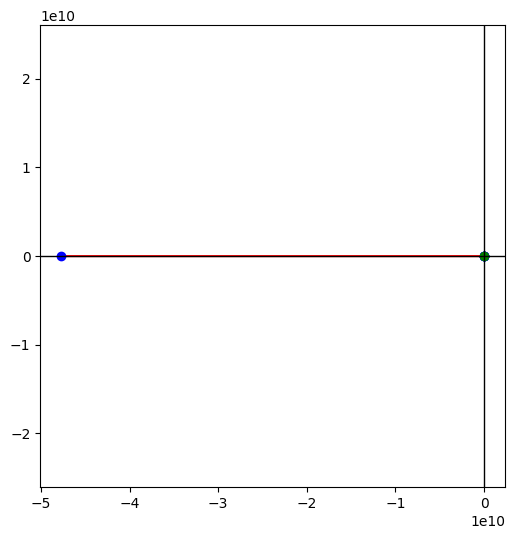

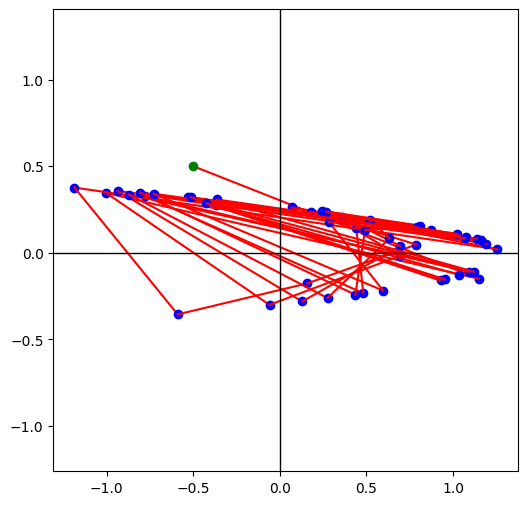

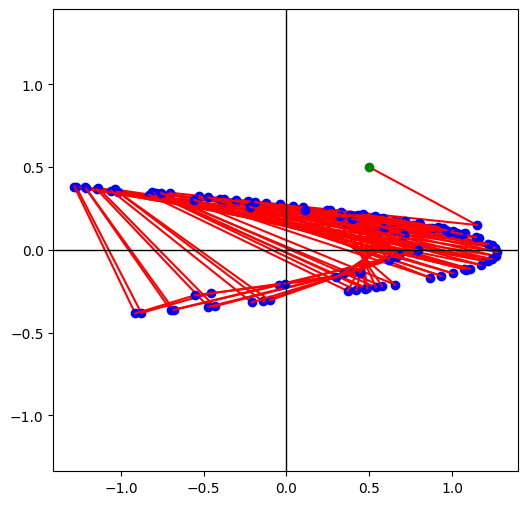

In [ ]:
def f6(v):
    x, y = v
    fx = 1 + y - (7/5) * x**2
    fy = 0.3 * x 
    return [fx, fy]

x0 = [0,2.5]  
for k, p in enumerate(orb_num_2d(f6, x0, 5)):
    print(f'c{k+1} = {p}')

an_graf_2d_lineas(f6, x0, 5)
an_graf_2d_lineas(f6, [-0.5, 0.5], 50)
an_graf_2d_lineas(f6, [0.5,0.5], 120)

Parece este caso que hay un punto fijo de silla, pues si el punto x0 pertenece a la recta x = 0, parece que diverge al infinito, pero si no, parece que oscila entre otros valores, pero siempre los mismos, creando el dibujo de la figura.